# Create annotation visualization from one video

In [1]:
from ai_badminton.pose import read_player_poses
from ai_badminton.court import read_court, court_points_to_corners, Court
from ai_badminton.trajectory import Trajectory
from ai_badminton.video_annotator import annotate_video
from ai_badminton.hit_detector import read_hits

import cv2

import numpy as np
from pathlib import Path

## Read different data

In [6]:
dataset_root = "/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset"
prefix_template = dataset_root + "/match1/%s/1_01_00"

poses = read_player_poses(prefix_template %("poses"))

court_pts = read_court((prefix_template %("court")) + ".out")
court = Court(corners = court_points_to_corners(court_pts))

trajectory = Trajectory((prefix_template %("ball_trajectory")) + "_ball.csv")

hits_path = Path((prefix_template %("shot")) + "_hit_predict.csv")
result, is_hit = read_hits(hits_path)

video_file = (prefix_template %("rally_video")) + ".mp4"
cap = cv2.VideoCapture(video_file)
assert cap.isOpened(), f"Cannot open video {video_file}"

In [8]:
annotate_video(cap, court, poses, trajectory, result=result, is_hit=is_hit, outfile="./test.mp4")

  0%|          | 0/651 [00:00<?, ?it/s]

# Create annotation visualization from all video with 3d trajectory

In [9]:
from ai_badminton.pose import read_player_poses
from ai_badminton.court import read_court, court_points_to_corners, Court
from ai_badminton.trajectory import Trajectory, read_trajectory_3d
from ai_badminton.video_annotator import annotate_video_3d
from ai_badminton.hit_detector import read_hits
from ai_badminton.pipeline_clean import read_poses_court_trajectory

import cv2

import numpy as np
from pathlib import Path

for match_idx in range(1, 23):
    match_path = Path(f"/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match{match_idx}")

    rally_videos = (match_path / "rally_video").glob("*.mp4")
    video_names = [p.stem for p in rally_videos]

    for video_name in video_names:

        video_path = match_path / "rally_video" / (video_name + ".mp4")

        cap = cv2.VideoCapture(str(video_path))
        assert cap.isOpened()

        trajectory_3d_path = match_path / "ball_trajectory_3d_bootstraped" / (video_path.stem + "_3d.csv")
        print(trajectory_3d_path)
        assert trajectory_3d_path.is_file()

        metadata = read_poses_court_trajectory(match_path, video_path.stem)
        output_path = match_path / "annotated_3d" / (video_path.stem + "_3d_bootstraped.mp4")
        output_path.parent.mkdir(parents=True, exist_ok=True)
        annotate_video_3d(
            cap,
            metadata["court3d"],
            read_trajectory_3d(trajectory_3d_path),
            outfile = str(output_path)
        )
        print("Done")


/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match1/ball_trajectory_3d_bootstraped/1_03_04_3d.csv
90


  0%|          | 0/90 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match1/ball_trajectory_3d_bootstraped/1_06_06_3d.csv
107


  0%|          | 0/107 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match1/ball_trajectory_3d_bootstraped/1_06_08_3d.csv
52


  0%|          | 0/52 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match1/ball_trajectory_3d_bootstraped/1_02_00_3d.csv
456


  0%|          | 0/456 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match1/ball_trajectory_3d_bootstraped/1_03_05_3d.csv
339


  0%|          | 0/339 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match1/ball_trajectory_3d_bootstraped/1_02_01_3d.csv
128


  0%|          | 0/128 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match1/ball_trajectory_3d_bootstraped/1_06_09_3d.csv
398


  0%|          | 0/398 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match1/ball_trajectory_3d_bootstraped/1_02_02_3d.csv
164


  0%|          | 0/164 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match1/ball_trajectory_3d_bootstraped/1_03_06_3d.csv
186


  0%|          | 0/186 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match1/ball_trajectory_3d_bootstraped/1_01_00_3d.csv
590


  0%|          | 0/590 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match1/ball_trajectory_3d_bootstraped/1_02_03_3d.csv
1


  0%|          | 0/1 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match1/ball_trajectory_3d_bootstraped/1_02_04_3d.csv
70


  0%|          | 0/70 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match2/ball_trajectory_3d_bootstraped/1_08_12_3d.csv
195


  0%|          | 0/195 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match2/ball_trajectory_3d_bootstraped/1_06_09_3d.csv
376


  0%|          | 0/376 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match2/ball_trajectory_3d_bootstraped/1_06_08_3d.csv
265


  0%|          | 0/265 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match2/ball_trajectory_3d_bootstraped/1_02_03_3d.csv
203


  0%|          | 0/203 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match2/ball_trajectory_3d_bootstraped/1_09_12_3d.csv
388


  0%|          | 0/388 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match2/ball_trajectory_3d_bootstraped/1_04_03_3d.csv
204


  0%|          | 0/204 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match2/ball_trajectory_3d_bootstraped/1_08_11_3d.csv
243


  0%|          | 0/243 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match2/ball_trajectory_3d_bootstraped/1_00_02_3d.csv
530


  0%|          | 0/530 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match3/ball_trajectory_3d_bootstraped/2_18_15_3d.csv
1102


  0%|          | 0/1102 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match3/ball_trajectory_3d_bootstraped/1_12_17_3d.csv
302


  0%|          | 0/302 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match3/ball_trajectory_3d_bootstraped/2_04_07_3d.csv
582


  0%|          | 0/582 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match3/ball_trajectory_3d_bootstraped/2_10_12_3d.csv
167


  0%|          | 0/167 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match3/ball_trajectory_3d_bootstraped/1_08_10_3d.csv
50


  0%|          | 0/50 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match3/ball_trajectory_3d_bootstraped/1_01_00_3d.csv
404


  0%|          | 0/404 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match3/ball_trajectory_3d_bootstraped/3_11_10_3d.csv
158


  0%|          | 0/158 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match4/ball_trajectory_3d_bootstraped/1_03_02_3d.csv
321


  0%|          | 0/321 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match4/ball_trajectory_3d_bootstraped/2_14_17_3d.csv
154


  0%|          | 0/154 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match4/ball_trajectory_3d_bootstraped/3_07_05_3d.csv
117


  0%|          | 0/117 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match4/ball_trajectory_3d_bootstraped/3_02_00_3d.csv
301


  0%|          | 0/301 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match4/ball_trajectory_3d_bootstraped/2_05_07_3d.csv
364


  0%|          | 0/364 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match4/ball_trajectory_3d_bootstraped/3_18_17_3d.csv
527


  0%|          | 0/527 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match4/ball_trajectory_3d_bootstraped/2_02_05_3d.csv
431


  0%|          | 0/431 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match4/ball_trajectory_3d_bootstraped/1_15_10_3d.csv
346


  0%|          | 0/346 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match5/ball_trajectory_3d_bootstraped/1_01_01_3d.csv
685


  0%|          | 0/685 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match5/ball_trajectory_3d_bootstraped/2_20_17_3d.csv
661


  0%|          | 0/661 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match5/ball_trajectory_3d_bootstraped/1_21_19_3d.csv
612


  0%|          | 0/612 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match5/ball_trajectory_3d_bootstraped/1_01_02_3d.csv
471


  0%|          | 0/471 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match5/ball_trajectory_3d_bootstraped/2_15_13_3d.csv
481


  0%|          | 0/481 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match5/ball_trajectory_3d_bootstraped/1_19_18_3d.csv
212


  0%|          | 0/212 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match6/ball_trajectory_3d_bootstraped/1_19_12_3d.csv
268


  0%|          | 0/268 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match6/ball_trajectory_3d_bootstraped/1_15_06_3d.csv
830


  0%|          | 0/830 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match6/ball_trajectory_3d_bootstraped/1_05_03_3d.csv
1036


  0%|          | 0/1036 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match6/ball_trajectory_3d_bootstraped/1_11_04_3d.csv
526


  0%|          | 0/526 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match6/ball_trajectory_3d_bootstraped/1_02_00_3d.csv
461


  0%|          | 0/461 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match7/ball_trajectory_3d_bootstraped/2_14_15_3d.csv
460


  0%|          | 0/460 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match7/ball_trajectory_3d_bootstraped/1_12_13_3d.csv
565


  0%|          | 0/565 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match7/ball_trajectory_3d_bootstraped/2_05_03_3d.csv
894


  0%|          | 0/894 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match7/ball_trajectory_3d_bootstraped/1_02_01_3d.csv
598


  0%|          | 0/598 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match7/ball_trajectory_3d_bootstraped/3_08_05_3d.csv
420


  0%|          | 0/420 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match8/ball_trajectory_3d_bootstraped/3_17_12_3d.csv
532


  0%|          | 0/532 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match8/ball_trajectory_3d_bootstraped/1_05_13_3d.csv
222


  0%|          | 0/222 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match8/ball_trajectory_3d_bootstraped/3_02_00_3d.csv
35


  0%|          | 0/35 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match8/ball_trajectory_3d_bootstraped/3_21_13_3d.csv
296


  0%|          | 0/296 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match8/ball_trajectory_3d_bootstraped/2_03_06_3d.csv
980


  0%|          | 0/980 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match8/ball_trajectory_3d_bootstraped/3_15_08_3d.csv
130


  0%|          | 0/130 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match8/ball_trajectory_3d_bootstraped/2_10_12_3d.csv
478


  0%|          | 0/478 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match8/ball_trajectory_3d_bootstraped/1_01_00_3d.csv
319


  0%|          | 0/319 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match9/ball_trajectory_3d_bootstraped/1_04_05_3d.csv
186


  0%|          | 0/186 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match9/ball_trajectory_3d_bootstraped/1_07_10_3d.csv
508


  0%|          | 0/508 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match9/ball_trajectory_3d_bootstraped/1_05_06_3d.csv
211


  0%|          | 0/211 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match9/ball_trajectory_3d_bootstraped/1_02_03_3d.csv
259


  0%|          | 0/259 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match9/ball_trajectory_3d_bootstraped/1_07_07_3d.csv
248


  0%|          | 0/248 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match9/ball_trajectory_3d_bootstraped/1_07_11_3d.csv
230


  0%|          | 0/230 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match9/ball_trajectory_3d_bootstraped/1_01_03_3d.csv
794


  0%|          | 0/794 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match9/ball_trajectory_3d_bootstraped/1_07_14_3d.csv
158


  0%|          | 0/158 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match9/ball_trajectory_3d_bootstraped/1_06_06_3d.csv
178


  0%|          | 0/178 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match10/ball_trajectory_3d_bootstraped/1_12_16_3d.csv
433


  0%|          | 0/433 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match10/ball_trajectory_3d_bootstraped/2_14_08_3d.csv
705


  0%|          | 0/705 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match10/ball_trajectory_3d_bootstraped/1_03_03_3d.csv
469


  0%|          | 0/469 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match10/ball_trajectory_3d_bootstraped/2_04_02_3d.csv
280


  0%|          | 0/280 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match10/ball_trajectory_3d_bootstraped/1_03_01_3d.csv
515


  0%|          | 0/515 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match11/ball_trajectory_3d_bootstraped/1_03_01_3d.csv
380


  0%|          | 0/380 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match11/ball_trajectory_3d_bootstraped/2_05_00_3d.csv
322


  0%|          | 0/322 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match11/ball_trajectory_3d_bootstraped/1_07_06_3d.csv
350


  0%|          | 0/350 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match11/ball_trajectory_3d_bootstraped/2_15_04_3d.csv
628


  0%|          | 0/628 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match11/ball_trajectory_3d_bootstraped/1_13_13_3d.csv
733


  0%|          | 0/733 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match12/ball_trajectory_3d_bootstraped/2_01_01_3d.csv
447


  0%|          | 0/447 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match12/ball_trajectory_3d_bootstraped/1_10_12_3d.csv
783


  0%|          | 0/783 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match12/ball_trajectory_3d_bootstraped/1_01_00_3d.csv
639


  0%|          | 0/639 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match12/ball_trajectory_3d_bootstraped/3_03_03_3d.csv
323


  0%|          | 0/323 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match12/ball_trajectory_3d_bootstraped/2_05_14_3d.csv
725


  0%|          | 0/725 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match13/ball_trajectory_3d_bootstraped/2_06_05_3d.csv
831


  0%|          | 0/831 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match13/ball_trajectory_3d_bootstraped/2_17_11_3d.csv
403


  0%|          | 0/403 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match13/ball_trajectory_3d_bootstraped/2_09_08_3d.csv
86


  0%|          | 0/86 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match13/ball_trajectory_3d_bootstraped/1_17_15_3d.csv
262


  0%|          | 0/262 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match13/ball_trajectory_3d_bootstraped/2_07_05_3d.csv
157


  0%|          | 0/157 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match13/ball_trajectory_3d_bootstraped/1_09_10_3d.csv
500


  0%|          | 0/500 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match14/ball_trajectory_3d_bootstraped/2_19_13_3d.csv
661


  0%|          | 0/661 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match14/ball_trajectory_3d_bootstraped/2_15_10_3d.csv
118


  0%|          | 0/118 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match14/ball_trajectory_3d_bootstraped/2_13_06_3d.csv
499


  0%|          | 0/499 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match14/ball_trajectory_3d_bootstraped/2_21_17_3d.csv
355


  0%|          | 0/355 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match14/ball_trajectory_3d_bootstraped/1_17_14_3d.csv
640


  0%|          | 0/640 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match15/ball_trajectory_3d_bootstraped/2_16_12_3d.csv
486


  0%|          | 0/486 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match15/ball_trajectory_3d_bootstraped/1_21_12_3d.csv
238


  0%|          | 0/238 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match15/ball_trajectory_3d_bootstraped/2_19_14_3d.csv
630


  0%|          | 0/630 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match15/ball_trajectory_3d_bootstraped/2_14_08_3d.csv
141


  0%|          | 0/141 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match15/ball_trajectory_3d_bootstraped/2_18_14_3d.csv
802


  0%|          | 0/802 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match16/ball_trajectory_3d_bootstraped/1_03_06_3d.csv
537


  0%|          | 0/537 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match16/ball_trajectory_3d_bootstraped/3_17_16_3d.csv
338


  0%|          | 0/338 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match16/ball_trajectory_3d_bootstraped/2_08_08_3d.csv
408


  0%|          | 0/408 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match16/ball_trajectory_3d_bootstraped/3_14_09_3d.csv
259


  0%|          | 0/259 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match16/ball_trajectory_3d_bootstraped/3_12_06_3d.csv
603


  0%|          | 0/603 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match16/ball_trajectory_3d_bootstraped/1_13_20_3d.csv
351


  0%|          | 0/351 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match17/ball_trajectory_3d_bootstraped/1_02_02_3d.csv
308


  0%|          | 0/308 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match17/ball_trajectory_3d_bootstraped/2_01_01_3d.csv
443


  0%|          | 0/443 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match17/ball_trajectory_3d_bootstraped/2_15_11_3d.csv
357


  0%|          | 0/357 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match17/ball_trajectory_3d_bootstraped/2_18_11_3d.csv
403


  0%|          | 0/403 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match17/ball_trajectory_3d_bootstraped/2_08_05_3d.csv
469


  0%|          | 0/469 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match17/ball_trajectory_3d_bootstraped/1_15_13_3d.csv
440


  0%|          | 0/440 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match18/ball_trajectory_3d_bootstraped/3_12_14_3d.csv
365


  0%|          | 0/365 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match18/ball_trajectory_3d_bootstraped/1_06_12_3d.csv
321


  0%|          | 0/321 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match18/ball_trajectory_3d_bootstraped/3_20_19_3d.csv
357


  0%|          | 0/357 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match18/ball_trajectory_3d_bootstraped/2_02_02_3d.csv
393


  0%|          | 0/393 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match18/ball_trajectory_3d_bootstraped/3_16_17_3d.csv
319


  0%|          | 0/319 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match18/ball_trajectory_3d_bootstraped/3_03_05_3d.csv
633


  0%|          | 0/633 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match19/ball_trajectory_3d_bootstraped/1_07_08_3d.csv
415


  0%|          | 0/415 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match19/ball_trajectory_3d_bootstraped/1_01_01_3d.csv
401


  0%|          | 0/401 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match19/ball_trajectory_3d_bootstraped/2_14_08_3d.csv
419


  0%|          | 0/419 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match19/ball_trajectory_3d_bootstraped/2_12_06_3d.csv
474


  0%|          | 0/474 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match19/ball_trajectory_3d_bootstraped/1_01_03_3d.csv
850


  0%|          | 0/850 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match20/ball_trajectory_3d_bootstraped/2_00_01_3d.csv
254


  0%|          | 0/254 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match20/ball_trajectory_3d_bootstraped/2_19_14_3d.csv
456


  0%|          | 0/456 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match20/ball_trajectory_3d_bootstraped/1_09_05_3d.csv
624


  0%|          | 0/624 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match20/ball_trajectory_3d_bootstraped/2_07_08_3d.csv
360


  0%|          | 0/360 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match20/ball_trajectory_3d_bootstraped/2_05_08_3d.csv
713


  0%|          | 0/713 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match20/ball_trajectory_3d_bootstraped/1_11_10_3d.csv
431


  0%|          | 0/431 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match21/ball_trajectory_3d_bootstraped/2_04_04_3d.csv
268


  0%|          | 0/268 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match21/ball_trajectory_3d_bootstraped/2_02_03_3d.csv
338


  0%|          | 0/338 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match21/ball_trajectory_3d_bootstraped/2_09_08_3d.csv
533


  0%|          | 0/533 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match21/ball_trajectory_3d_bootstraped/2_12_08_3d.csv
271


  0%|          | 0/271 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match21/ball_trajectory_3d_bootstraped/1_02_01_3d.csv
299


  0%|          | 0/299 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match21/ball_trajectory_3d_bootstraped/1_16_17_3d.csv
504


  0%|          | 0/504 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match21/ball_trajectory_3d_bootstraped/1_19_19_3d.csv
147


  0%|          | 0/147 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match22/ball_trajectory_3d_bootstraped/1_02_01_3d.csv
898


  0%|          | 0/898 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match22/ball_trajectory_3d_bootstraped/3_15_13_3d.csv
397


  0%|          | 0/397 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match22/ball_trajectory_3d_bootstraped/1_07_02_3d.csv
387


  0%|          | 0/387 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match22/ball_trajectory_3d_bootstraped/2_18_18_3d.csv
507


  0%|          | 0/507 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match22/ball_trajectory_3d_bootstraped/2_17_18_3d.csv
604


  0%|          | 0/604 [00:00<?, ?it/s]

Done


# Create annotation visualization from all videos in a match

In [32]:
def annotate_all_videos(match_path):
    rally_videos = (match_path / "rally_video").glob("*.mp4")
    video_names = [p.stem for p in rally_videos]
    
    for video_name in video_names:
        print(f"Processing video: {video_name}")
        poses = read_player_poses(str(match_path / "poses" / video_name))
        
        court_pts = read_court(str(match_path / "court" / (video_name + ".out")))
        court = Court(corners = court_points_to_corners(court_pts))

        trajectory = Trajectory(str(match_path / "ball_trajectory" / (str(video_name) + "_ball_predict.csv")))

        video_file = str(match_path / "rally_video" / (video_name + ".mp4"))
            
        cap = cv2.VideoCapture(video_file)
        assert cap.isOpened(), f"Cannot open video {video_file}"
        
        out_dir = match_path / "annotated_2d"
        out_dir.mkdir(parents=True, exist_ok=True)
        out_path = out_dir / (video_name + ".mp4")
        annotate_video(cap, court, poses, trajectory, outfile=str(out_path))


In [34]:
annotate_all_videos(Path("/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match1_cp/"))

Processing video: 1_01_00


  0%|          | 0/651 [00:00<?, ?it/s]

Processing video: 1_02_04


  0%|          | 0/153 [00:00<?, ?it/s]

Processing video: 1_02_03


  0%|          | 0/78 [00:00<?, ?it/s]

Processing video: 1_03_06


  0%|          | 0/249 [00:00<?, ?it/s]

Processing video: 1_02_02


  0%|          | 0/258 [00:00<?, ?it/s]

Processing video: 1_02_01


  0%|          | 0/195 [00:00<?, ?it/s]

Processing video: 1_06_09


  0%|          | 0/453 [00:00<?, ?it/s]

Processing video: 1_03_05


  0%|          | 0/357 [00:00<?, ?it/s]

Processing video: 1_06_08


  0%|          | 0/99 [00:00<?, ?it/s]

Processing video: 1_06_06


  0%|          | 0/156 [00:00<?, ?it/s]

Processing video: 1_02_00


  0%|          | 0/498 [00:00<?, ?it/s]

Processing video: 1_03_04


  0%|          | 0/138 [00:00<?, ?it/s]

# Visualize the inferenced hits versus ground truth

In [3]:
%matplotlib widget

import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd

In [19]:
def plot_shot_differences(hit_groundtruth_path):
    gt_path = hit_groundtruth_path
    pred_path = Path(str(gt_path.with_suffix("")) + "_predict.csv")
    assert gt_path.is_file() and pred_path.is_file()
    
    gt = pd.read_csv(str(gt_path))
    pred = pd.read_csv(str(pred_path))
    
    plt.figure()
    plt.plot(gt.values[:,1], 'o', label="ground truth")
    plt.plot((pred.values[:,1]>0), 'x', label="prediction")
    plt.legend(loc=0)
    plt.show()
    
    

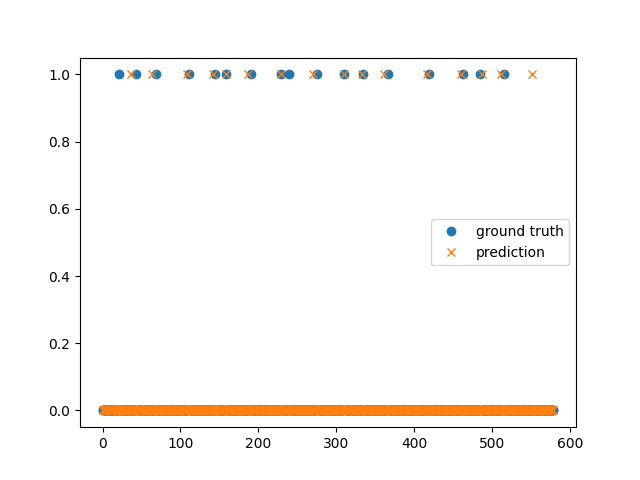

In [21]:

plot_shot_differences(Path("/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match10/shot/1_03_01_hit.csv"))